# Visualising the data

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Load the data

Load the data extracted from openstreetmap

In [2]:
df_nodes = pd.read_csv("/notebooks/Power/data/nodes_clean.csv")
df_nodes.head()

,id,lat,lon,timestamp,uid
0,206996054,-12.883298,-67.012849,2008-01-06T11:40:59Z,7180
1,206996056,-12.884207,-67.009984,2008-01-06T11:40:59Z,7180
2,206996075,-12.879662,-66.994694,2008-01-06T11:41:00Z,7180
3,206996079,-12.877155,-66.994831,2008-01-06T11:41:00Z,7180
4,206996081,-12.873904,-66.995134,2008-01-06T11:41:00Z,7180


In [3]:
# Just spliting the data.
train=df_nodes.sample(frac=0.95,random_state=0)
test=df_nodes.drop(train.index)
train.shape

(10072, 5)

In [4]:
test.shape

(530, 5)

In [22]:

# Creating a mask for plot 0.7 of the data
msk = np.random.rand(len(df_nodes)) < 0.7
train = df_nodes[msk]

test = df_nodes[~msk]

test.shape


(3210, 5)

In [47]:

df_nodes = train

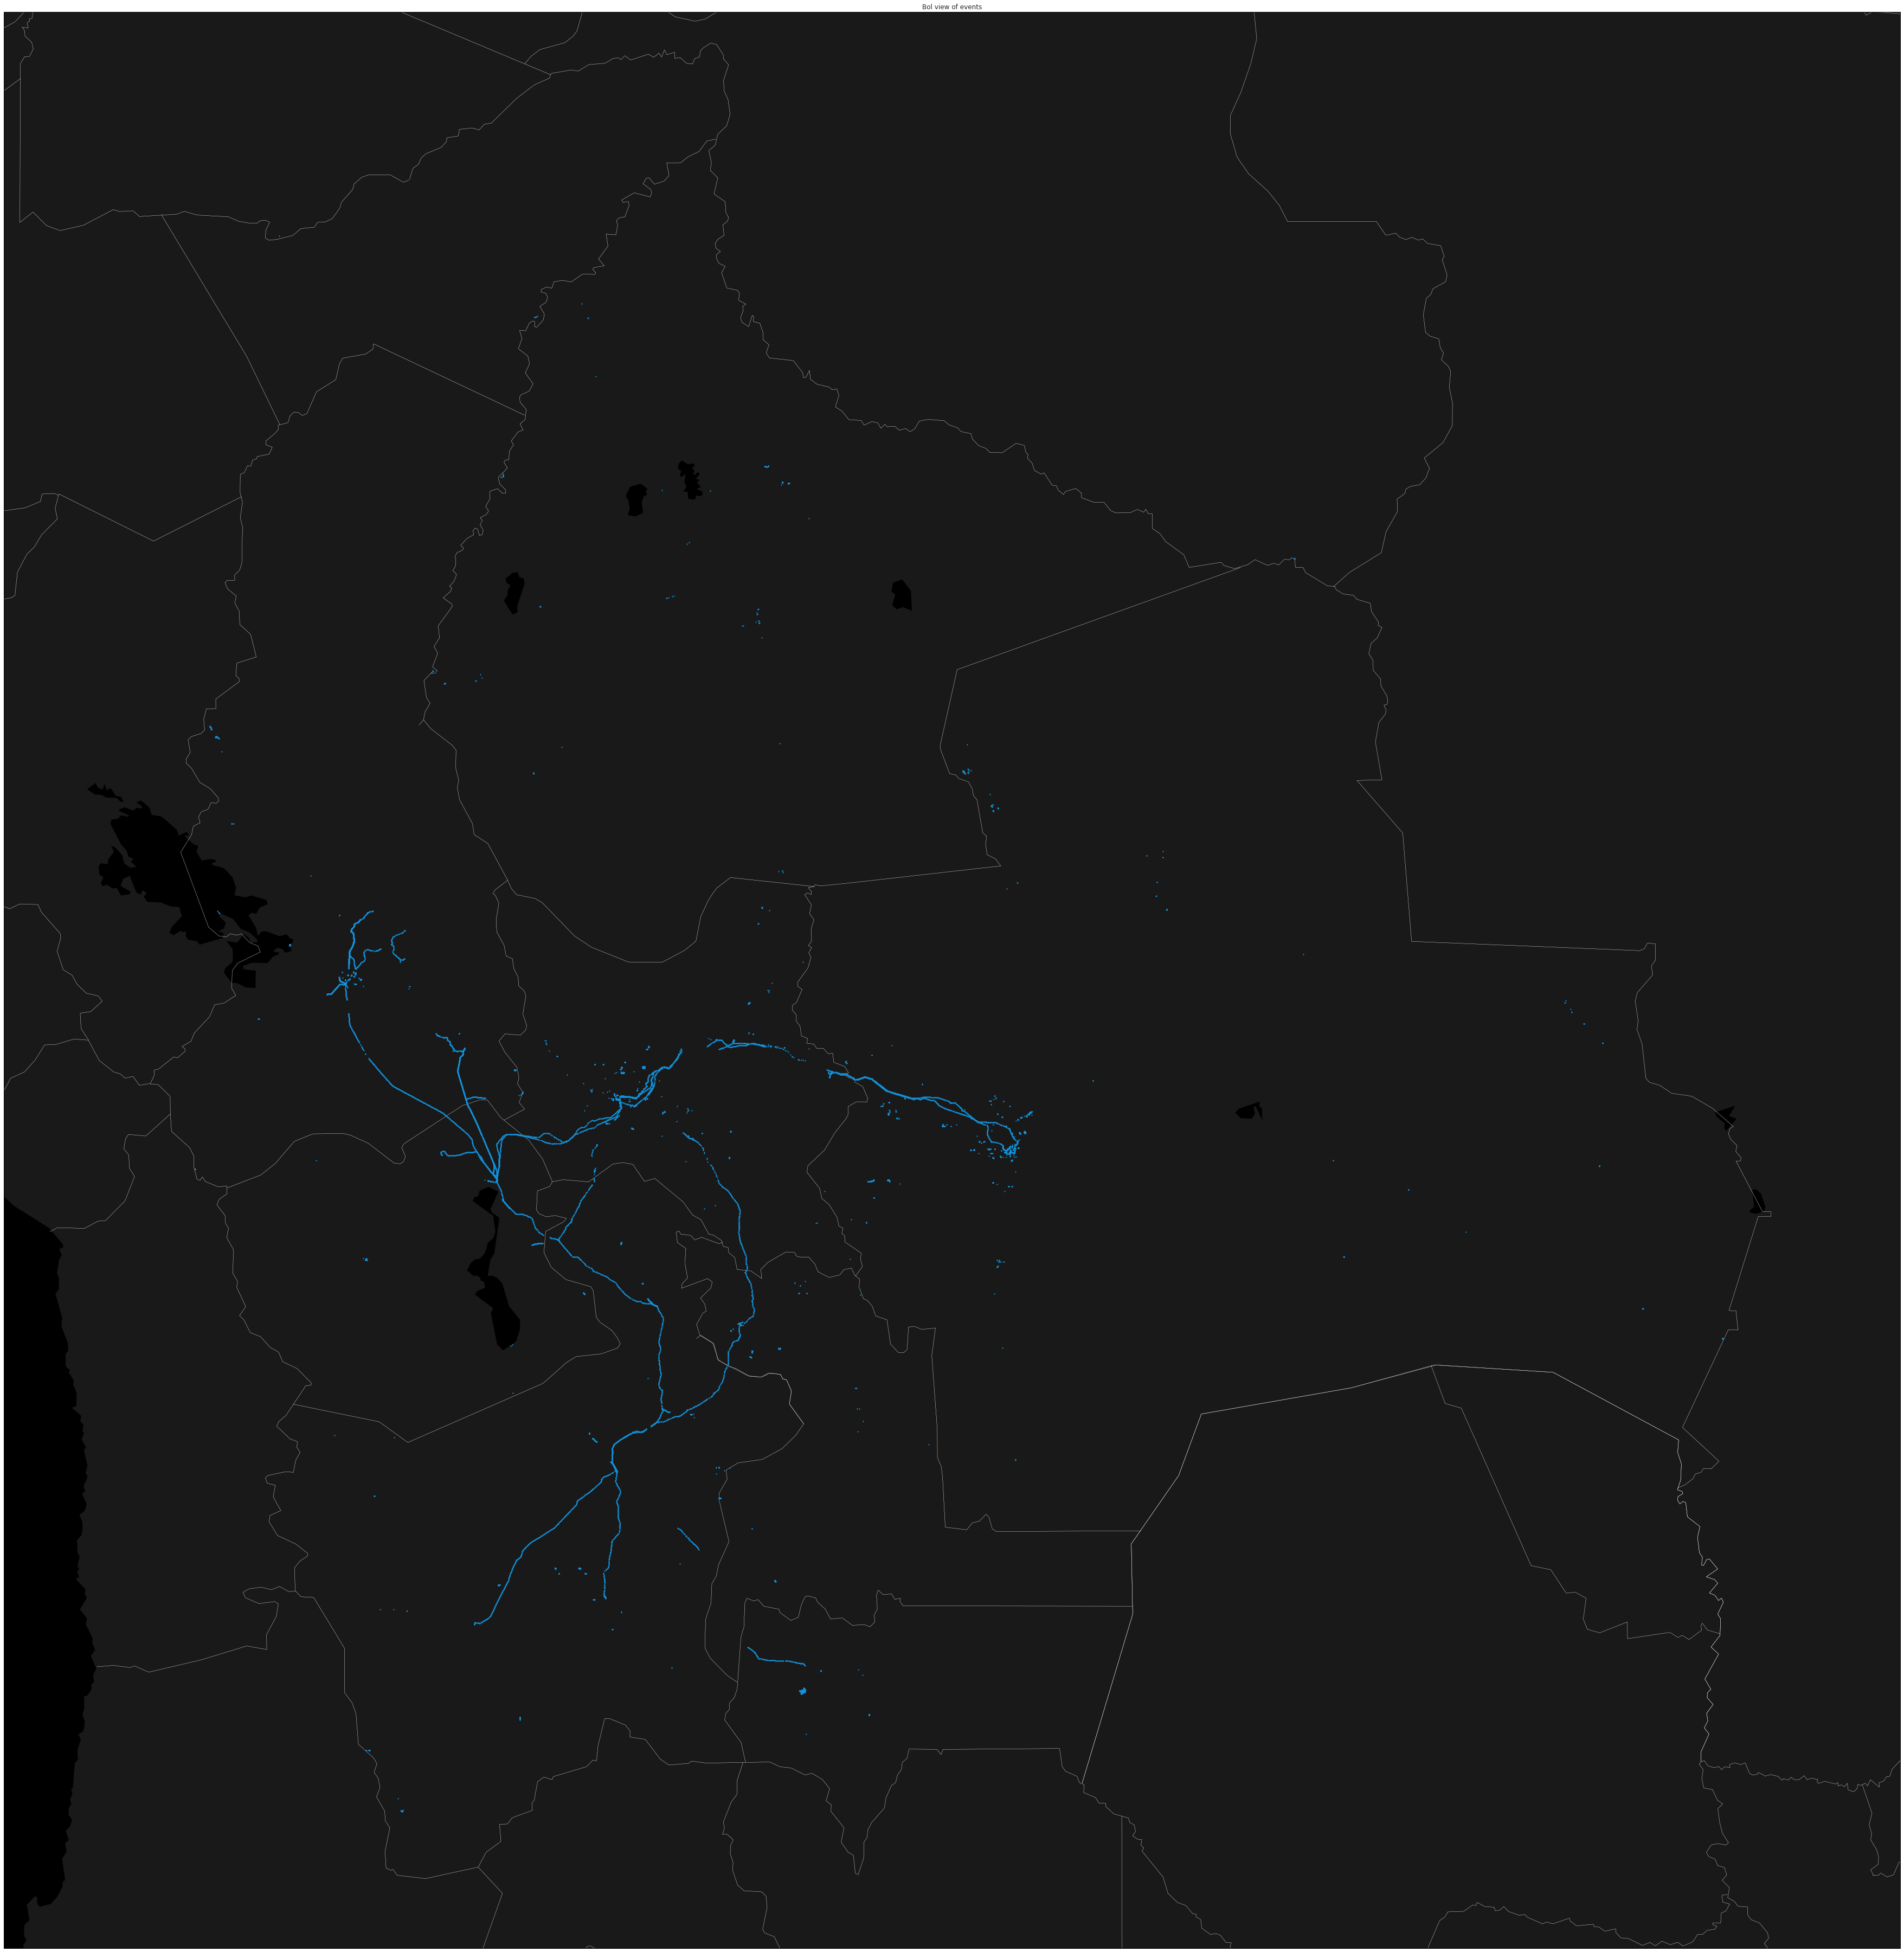

In [5]:


# Sample it down to only the Bolivian region
lon_min, lon_max = -70.752, -23.483-33
lat_min, lat_max = -56.382+33, -9.449

idx_bol = (df_nodes["lon"]>lon_min) &\
            (df_nodes["lon"]<lon_max) &\
            (df_nodes["lat"]>lat_min) &\
            (df_nodes["lat"]<lat_max)

df_nodes_bol = df_nodes[idx_bol]

# Mercator of Bolivia
plt.figure(4, figsize=(64,64))

m = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.4, color="w")              # thin white line for country borders
m.drawstates(linewidth=0.4, color="w")
# Plot the data
mxy = m(df_nodes_bol["lon"].tolist(), df_nodes_bol["lat"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=1, zorder=8)

plt.title("Bol view of events")
plt.show()

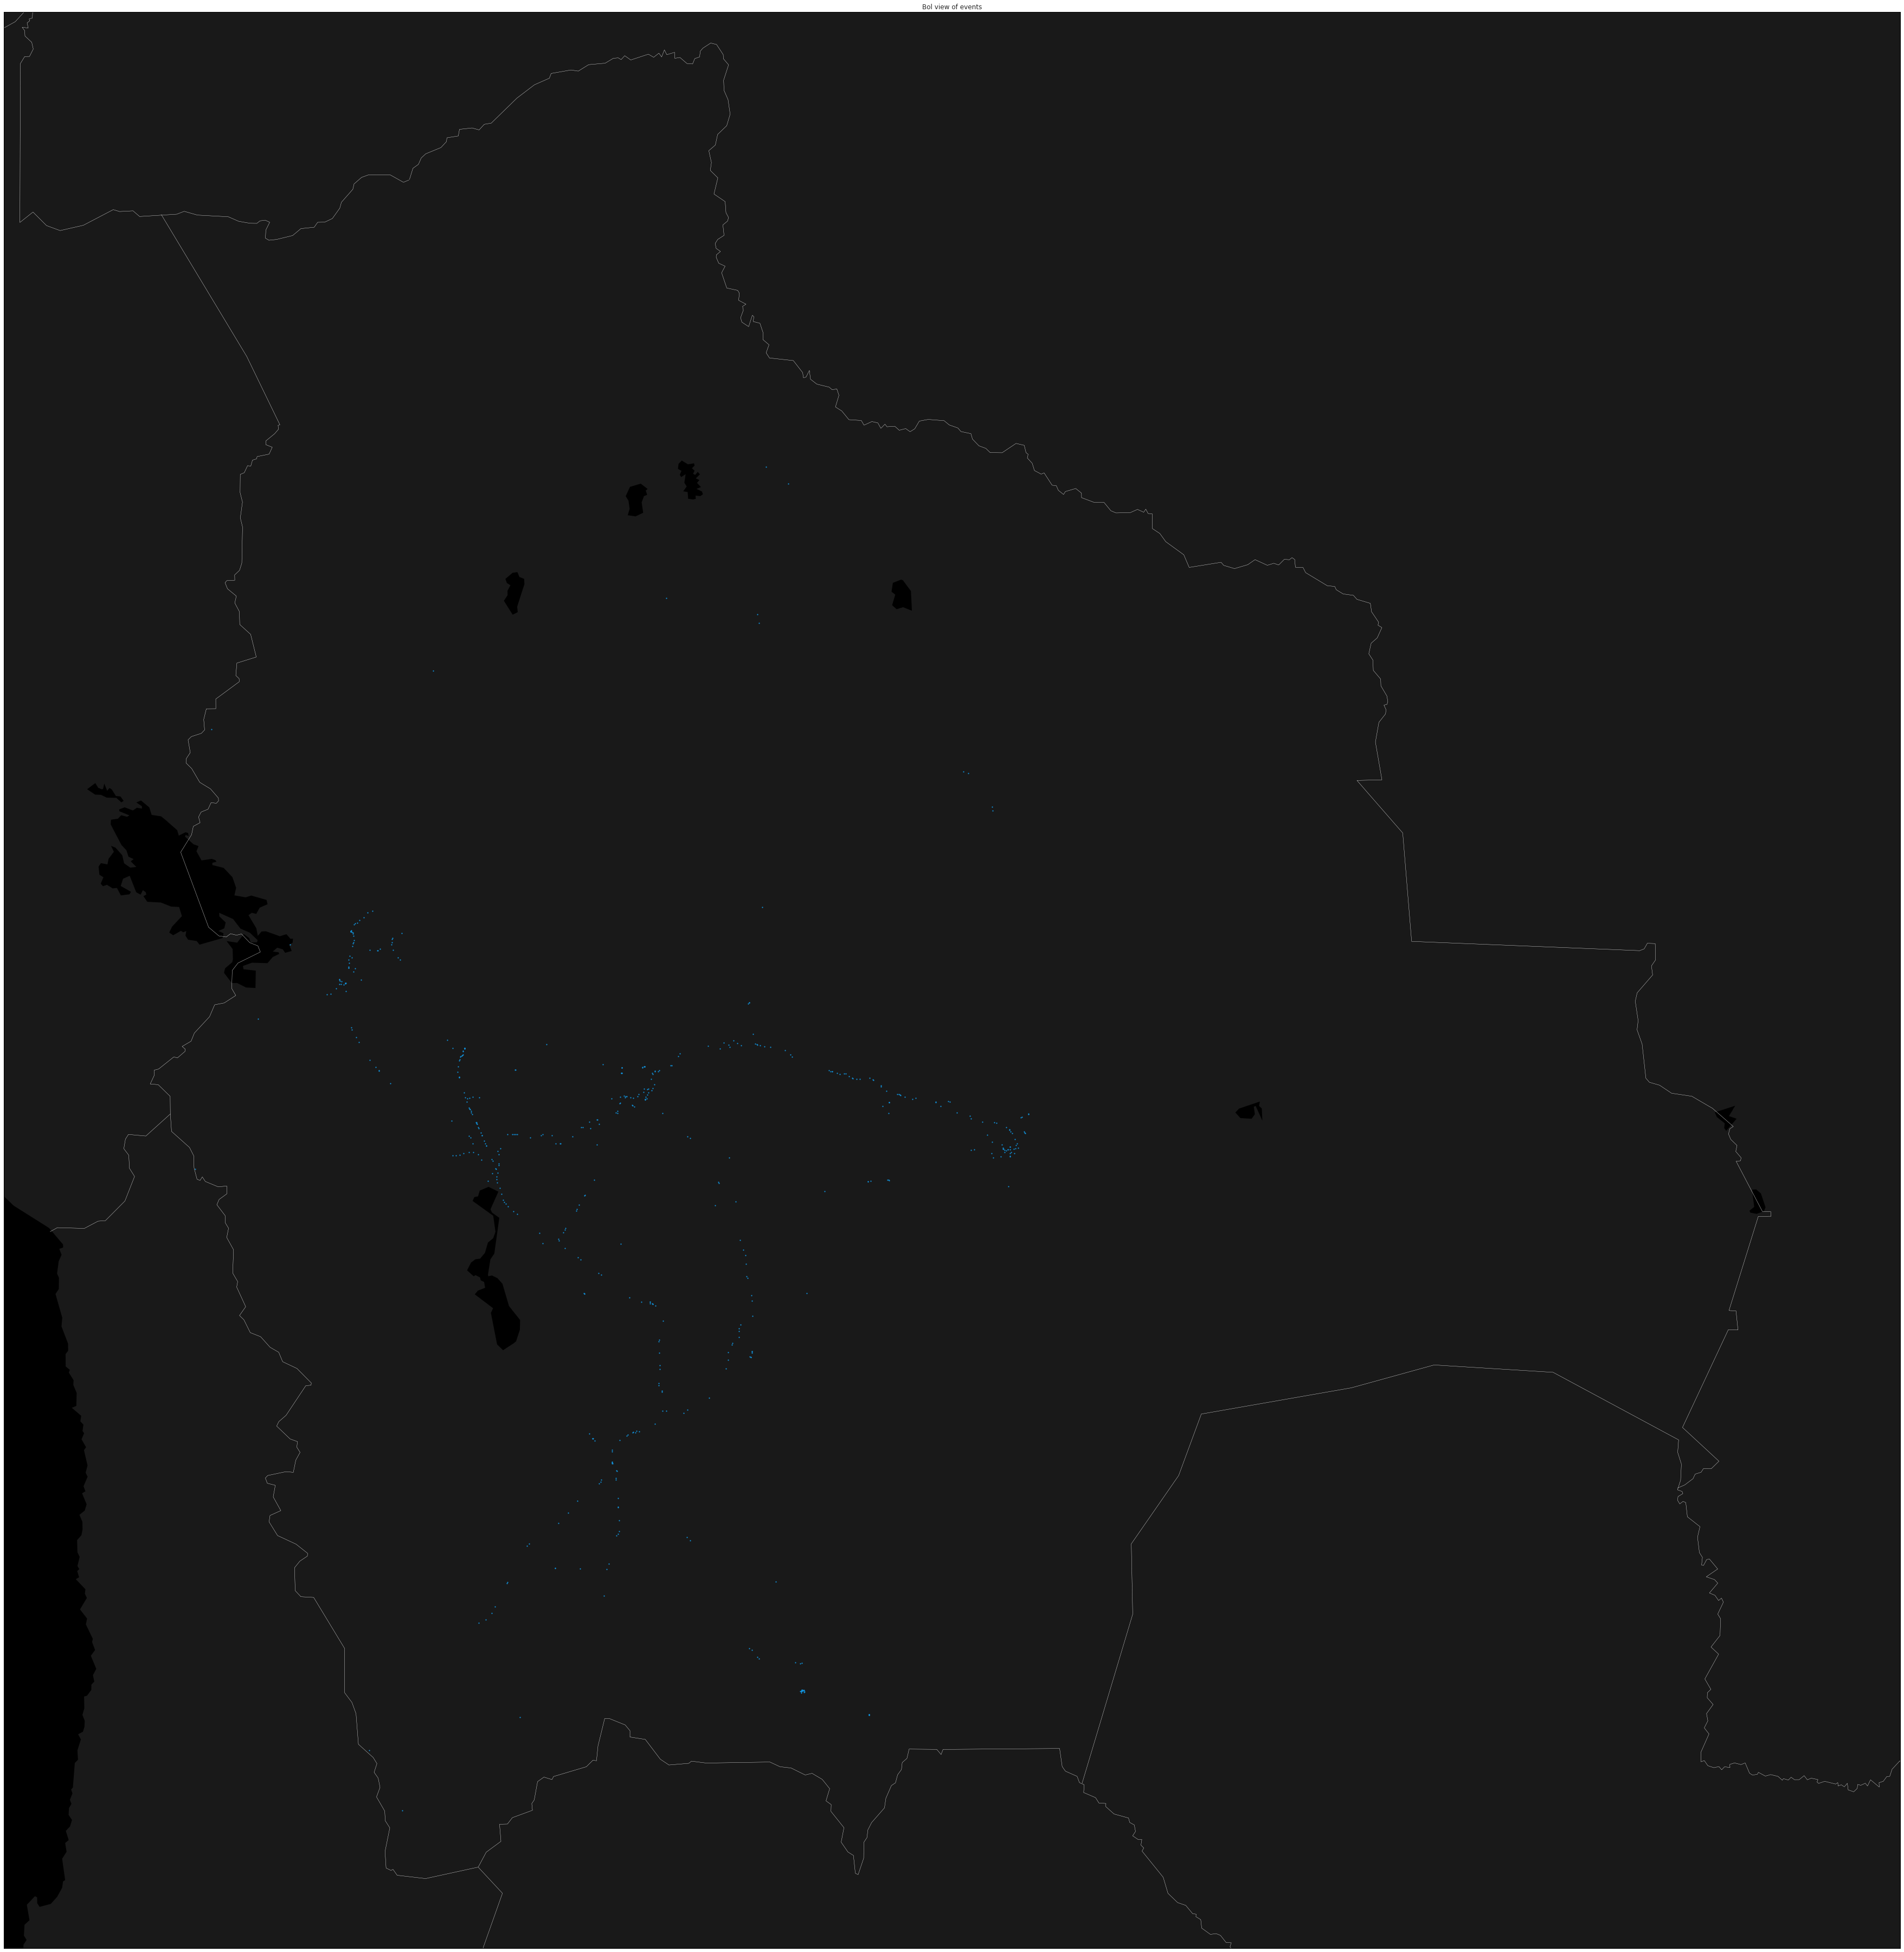

In [48]:

df_nodes = test

# Sample it down to only the Bolivian region
lon_min, lon_max = -70.752, -23.483-33
lat_min, lat_max = -56.382+33, -9.449

idx_bol = (df_nodes["lon"]>lon_min) &\
            (df_nodes["lon"]<lon_max) &\
            (df_nodes["lat"]>lat_min) &\
            (df_nodes["lat"]<lat_max)

df_nodes_bol = df_nodes[idx_bol]

# Mercator of China
plt.figure(4, figsize=(64,64))

m = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.4, color="w")              # thin white line for country borders

# Plot the data
mxy = m(df_nodes_bol["lon"].tolist(), df_nodes_bol["lat"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=1, zorder=8)

plt.title("Bol view of events")
plt.show()

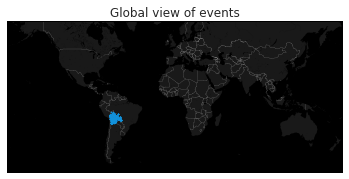

In [9]:
# Mercator of World
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='i')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
#plt.figure(4, figsize=(64,64))
# Plot the data
mxy = m1(df_nodes_bol["lon"].tolist(), df_nodes_bol["lat"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()